In [1]:
# ref https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import figure
%matplotlib inline  
import math
import nltk
from nltk.corpus import stopwords

import pandas as pd
from scipy.sparse import coo_matrix

doclist = []
path = 'Data/1800FLOWERSCOMInc.txt'
path1 = 'Data/2UInc.txt'
path2 = 'Data/3DSystemsCorporation.txt'
paths = [path, path1, path2]
for path in paths:
    file = open(path, "r") 
    # print "Output of Readlines after appending"
    text = file.readlines()
    doclist.append(text[0])


[1] "Item 1A. Risk Factors. Cautionary Statements Under the Private Securities Litigation Reform Act of 1995. Our disclosures and analysis in this Form 10-K contain some forward-looking statements that set forth anticipated results based on management’s plans and assumptions. From time to time, we also provide forward-looking statements in other statements we release to the public as well as oral forward-looking statements. Such statements give our current expectations or forecasts of future events; they do not relate strictly to historical or current facts. We have tried, wherever possible, to identify such statements by using words such as “anticipate,” “estimate,” “expect,” “project,” “intend,” “plan,” “believe” and similar expressions in connection with any discussion of future operating or financial performance. In particular, these include statements relating to future actions; the effectiveness of our marketing programs; the performance of our existing products and services; our

In [160]:
def split_document(doc_text):
    split_text = doc_text.split(".")
    vectorizer = TfidfVectorizer(stop_words='english')
    # TODO: Custom stopwords, 1-800-flowers returned in multiple slices/formats-> Replace with [name]?
    X = vectorizer.fit_transform(split_text)
    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
    return X

In [156]:
split_text

['[1] "Item 1A',
 ' Risk Factors',
 ' Cautionary Statements Under the Private Securities Litigation Reform Act of 1995',
 ' Our disclosures and analysis in this Form 10-K contain some forward-looking statements that set forth anticipated results based on management’s plans and assumptions',
 ' From time to time, we also provide forward-looking statements in other statements we release to the public as well as oral forward-looking statements',
 ' Such statements give our current expectations or forecasts of future events; they do not relate strictly to historical or current facts',
 ' We have tried, wherever possible, to identify such statements by using words such as “anticipate,” “estimate,” “expect,” “project,” “intend,” “plan,” “believe” and similar expressions in connection with any discussion of future operating or financial performance',
 ' In particular, these include statements relating to future actions; the effectiveness of our marketing programs; the performance of our exist

In [161]:
X = split_document(doclist[0])
X

<337x1161 sparse matrix of type '<class 'numpy.float64'>'
	with 3211 stored elements in Compressed Sparse Row format>

C:\Users\xanen\Anaconda3\envs\Tensor\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


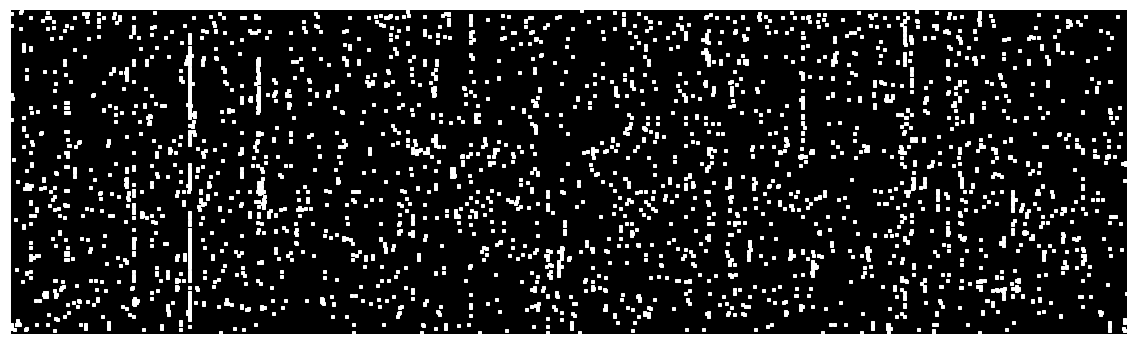

In [162]:

# https://stackoverflow.com/questions/22961541/python-matplotlib-plot-sparse-matrix-pattern
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = pyplot.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor ='black')
    ax.plot(m.col, m.row, 's', color='white', ms=3)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax



ax = plot_coo_matrix(X)
ax.figure.show()


In [163]:

# truek = PLEASE_FIND_ME
truek = 25
model = KMeans(n_clusters=truek, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=25, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [164]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [165]:
nclosest_words_to_show = 5
for i in range(truek):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :nclosest_words_to_show]:
     print(' %s' % terms[ind])

Cluster 0:
 american
 like
 unforeseen
 war
 terrorism
Cluster 1:
 value
 perceive
 high
 services
 quality
Cluster 2:
 company
 customers
 results
 business
 products
Cluster 3:
 disrupt
 infringement
 conduct
 successful
 claims
Cluster 4:
 diminished
 lose
 decline
 com
 brands
Cluster 5:
 unauthorized
 damage
 intellectual
 property
 parties
Cluster 6:
 1995
 reform
 act
 private
 securities
Cluster 7:
 contents
 table
 years
 existing
 event
Cluster 8:
 operating
 results
 indicative
 quarter
 particular
Cluster 9:
 gift
 plant
 basket
 gourmet
 food
Cluster 10:
 acquisitions
 results
 suffer
 acquired
 company
Cluster 11:
 25cf
 tthe
 marketing
 timing
 expenditures
Cluster 12:
 reliable
 sources
 tthe
 certain
 maintain
Cluster 13:
 ability
 marketing
 including
 services
 costs
Cluster 14:
 1800flowers
 years
 existing
 evaluate
 event
Cluster 15:
 800
 flowers
 phone
 strength
 company
Cluster 16:
 ecuador
 holland
 colombia
 abroad
 primarily
Cluster 17:
 defects
 procure
 co

In [166]:
print('\n')
print('Prediction')
X = vectorizer.transform(['Market outlook on coffee looks promising'])
predicted = model.predict(X)
print(predicted)




Prediction
[2]


In [167]:
# HOW DO WE FIND OUT WHAT #7 meams?, 1Closest_word to cluster definitely isn't it
for i in range(truek):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :1]:
     print(' %s' % terms[ind])

Cluster 0:
 american
Cluster 1:
 value
Cluster 2:
 company
Cluster 3:
 disrupt
Cluster 4:
 diminished
Cluster 5:
 unauthorized
Cluster 6:
 1995
Cluster 7:
 contents
Cluster 8:
 operating
Cluster 9:
 gift
Cluster 10:
 acquisitions
Cluster 11:
 25cf
Cluster 12:
 reliable
Cluster 13:
 ability
Cluster 14:
 1800flowers
Cluster 15:
 800
Cluster 16:
 ecuador
Cluster 17:
 defects
Cluster 18:
 personnel
Cluster 19:
 25cf
Cluster 20:
 default
Cluster 21:
 flowers
Cluster 22:
 liability
Cluster 23:
 included
Cluster 24:
 confidential


In [168]:
# using joblib to pickle model
from sklearn.externals import joblib
joblib.dump(model,  'doc_cluster.pkl')
model = joblib.load('doc_cluster.pkl')

In [186]:
## TF-IDF analysis 
def get_wordset(doc_text):
    words = doc_text.split(" ")
    wordSet = []
    stopWords = set(stopwords.words('english'))
    for w in words:
    #     wordSet.append(w)

        if w not in stopWords:
            wordSet.append(w)
    return wordSet

In [187]:
def get_wordDict(wordSet):
    wordDict = dict.fromkeys(wordSet, 0) 
    for word in wordSet:
        wordDict[word]+=1

    return wordDict

In [188]:
def computeTF(document_text):
    wordset = get_wordset(document_text)
    word_dict = get_wordDict(wordset)
    tfDict = {}
    word_count = len(wordset)
    for word, count in wordDict.items():
        tfDict[word] = count/float(word_count)
    return tfDict

In [189]:
term_frequency = computeTF(doclist[0])

In [190]:
term_frequency

{'[1]': 0.0002536783358701167,
 '"Item': 0.0002536783358701167,
 '1A.': 0.0002536783358701167,
 'Risk': 0.0002536783358701167,
 'Factors.': 0.0002536783358701167,
 '<U+FEFF>.': 0.034753932014205985,
 'The': 0.00380517503805175,
 'risks': 0.0035514967021816335,
 'uncertainties': 0.00076103500761035,
 'described': 0.0010147133434804667,
 'face.': 0.0002536783358701167,
 'Additional': 0.0002536783358701167,
 'currently': 0.0012683916793505834,
 'known': 0.0005073566717402334,
 'us': 0.006341958396752917,
 'deem': 0.0005073566717402334,
 'material': 0.0015220700152207,
 'also': 0.0035514967021816335,
 'may': 0.026128868594622018,
 'impair': 0.0005073566717402334,
 'business': 0.012430238457635717,
 'operations,': 0.0020294266869609334,
 'results': 0.00684931506849315,
 'operations': 0.007102993404363267,
 'financial': 0.009639776763064434,
 'condition.': 0.00076103500761035,
 'If': 0.004058853373921867,
 'actually': 0.0002536783358701167,
 'occurs,': 0.0005073566717402334,
 'business,': 0.

In [211]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    big_wordset = []
    for doc in docList:
        big_wordset += get_wordset(doc)
    big_wordDict = get_wordDict(big_wordset)
        
    idfDict = dict.fromkeys(big_wordDict.keys(), 0)
  
    for word, val in big_wordDict.items():
        if val > 0:
            idfDict[word] += 1

    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [212]:
idfs = computeIDF(doclist)
idfs

{'[1]': 0.47712125471966244,
 '"Item': 0.47712125471966244,
 '1A.': 0.47712125471966244,
 'Risk': 0.47712125471966244,
 'Factors.': 0.47712125471966244,
 'Cautionary': 0.47712125471966244,
 'Statements': 0.47712125471966244,
 'Under': 0.47712125471966244,
 'Private': 0.47712125471966244,
 'Securities': 0.47712125471966244,
 'Litigation': 0.47712125471966244,
 'Reform': 0.47712125471966244,
 'Act': 0.47712125471966244,
 '1995.': 0.47712125471966244,
 'Our': 0.47712125471966244,
 'disclosures': 0.47712125471966244,
 'analysis': 0.47712125471966244,
 'Form': 0.47712125471966244,
 '10-K': 0.47712125471966244,
 'contain': 0.47712125471966244,
 'forward-looking': 0.47712125471966244,
 'statements': 0.47712125471966244,
 'set': 0.47712125471966244,
 'forth': 0.47712125471966244,
 'anticipated': 0.47712125471966244,
 'results': 0.47712125471966244,
 'based': 0.47712125471966244,
 'management’s': 0.47712125471966244,
 'plans': 0.47712125471966244,
 'assumptions.': 0.47712125471966244,
 'From': 

In [213]:
def computeTFIDF(term_frequency, idfs):
    tfidf = {}
    for word, val in term_frequency.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [214]:
tfidfBow = computeTFIDF(term_frequency, idfs)


In [215]:
tfidfBow


{'[1]': 0.00012103532590554602,
 '"Item': 0.00012103532590554602,
 '1A.': 0.00012103532590554602,
 'Risk': 0.00012103532590554602,
 'Factors.': 0.00012103532590554602,
 '<U+FEFF>.': 0.016581839649059803,
 'The': 0.0018155298885831903,
 'risks': 0.0016944945626776442,
 'uncertainties': 0.0003631059777166381,
 'described': 0.0004841413036221841,
 'face.': 0.00012103532590554602,
 'Additional': 0.00012103532590554602,
 'currently': 0.0006051766295277301,
 'known': 0.00024207065181109204,
 'us': 0.0030258831476386505,
 'deem': 0.00024207065181109204,
 'material': 0.0007262119554332762,
 'also': 0.0016944945626776442,
 'may': 0.01246663856827124,
 'impair': 0.00024207065181109204,
 'business': 0.005930730969371755,
 'operations,': 0.0009682826072443682,
 'results': 0.0032679537994497426,
 'operations': 0.0033889891253552885,
 'financial': 0.004599342384410749,
 'condition.': 0.0003631059777166381,
 'If': 0.0019365652144887364,
 'actually': 0.00012103532590554602,
 'occurs,': 0.0002420706518

In [216]:
from operator import itemgetter
import heapq
import collections
def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))
least_common_values(tfidfBow, 5)

[('[1]', 0.00012103532590554602),
 ('"Item', 0.00012103532590554602),
 ('1A.', 0.00012103532590554602),
 ('Risk', 0.00012103532590554602),
 ('Factors.', 0.00012103532590554602)]

In [221]:
import collections
collections.Counter(tfidfBow).most_common(20)


[('<U+FEFF>.', 0.016581839649059803),
 ('\\t\\t\\t', 0.013555956501421154),
 ('may', 0.01246663856827124),
 ('could', 0.009803861398349227),
 ('·', 0.006777978250710577),
 ('\\t\\t', 0.006777978250710577),
 ('We', 0.006414872272993939),
 ('business', 0.005930730969371755),
 ('financial', 0.004599342384410749),
 ('products', 0.0043572717325996565),
 ('operations', 0.0033889891253552885),
 ('significant', 0.0033889891253552885),
 ('results', 0.0032679537994497426),
 ('adversely', 0.0031469184735441963),
 ('information', 0.0031469184735441963),
 ('us', 0.0030258831476386505),
 ('management', 0.0030258831476386505),
 ('subject', 0.0029048478217331046),
 ('result', 0.0027838124958275584),
 ('laws', 0.0027838124958275584)]

In [222]:
collections.Counter(term_frequency).most_common(20)



[('<U+FEFF>.', 0.034753932014205985),
 ('\\t\\t\\t', 0.028411973617453068),
 ('may', 0.026128868594622018),
 ('could', 0.02054794520547945),
 ('·', 0.014205986808726534),
 ('\\t\\t', 0.014205986808726534),
 ('We', 0.013444951801116184),
 ('business', 0.012430238457635717),
 ('financial', 0.009639776763064434),
 ('products', 0.0091324200913242),
 ('operations', 0.007102993404363267),
 ('significant', 0.007102993404363267),
 ('results', 0.00684931506849315),
 ('adversely', 0.006595636732623034),
 ('information', 0.006595636732623034),
 ('us', 0.006341958396752917),
 ('management', 0.006341958396752917),
 ('subject', 0.0060882800608828),
 ('result', 0.005834601725012684),
 ('laws', 0.005834601725012684)]

In [28]:
# Latent Dirichlet Allocation
# Ref http://brandonrose.org/clustering
# LDA is a probabilistic topic model that assumes documents
# are a mixture of topics and that each word in the document is attributable to the document's topics.
from nltk.stem.snowball import SnowballStemmer
import re
stemmer = SnowballStemmer("english")
import nltk
nltk.download('stopwords')
 
stopwords = nltk.corpus.stopwords.words('english')

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns
from gensim import corpora, models, similarities 

#remove proper names0
%time preprocess = [strip_proppers(doc) for doc in input_texts]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]
# print(texts)
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)
# print(dictionary)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
# dictionary.filter_extremes(no_below=1, no_above=0.8)  THIS FILTERS EVERYTHING OUT
# print(dictionary)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]
# print(corpus)
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xanen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Wall time: 138 ms
Wall time: 174 ms
Wall time: 18.9 ms
Wall time: 973 ms


In [29]:
lda.show_topics()


[(0,
  '0.001*"may" + 0.001*"custom" + 0.001*"result" + 0.001*"product" + 0.001*"busi" + 0.001*"signific" + 0.001*"could" + 0.001*"oper" + 0.001*"secret" + 0.001*"free"'),
 (1,
  '0.001*"may" + 0.001*"fragment" + 0.001*"free" + 0.001*"scenario" + 0.001*"forth" + 0.001*"forward" + 0.001*"fourth" + 0.001*"scope" + 0.001*"function" + 0.001*"robust"'),
 (2,
  '0.034*"may" + 0.020*"custom" + 0.016*"result" + 0.016*"could" + 0.014*"product" + 0.012*"busi" + 0.011*"oper" + 0.008*"\\t\\t\\t" + 0.008*"system" + 0.007*"number"'),
 (3,
  '0.001*"may" + 0.001*"fourth" + 0.001*"sabotag" + 0.001*"forese" + 0.001*"scenario" + 0.001*"forth" + 0.001*"forward" + 0.001*"forecast" + 0.001*"frost" + 0.001*"free"'),
 (4,
  '0.001*"may" + 0.001*"fragment" + 0.001*"free" + 0.001*"scenario" + 0.001*"forth" + 0.001*"forward" + 0.001*"fourth" + 0.001*"scope" + 0.001*"function" + 0.001*"robust"')]

In [30]:
topics_matrix = lda.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['may', 'custom', 'result', 'product', 'could', 'oper', 'busi', 'signific', 'secret', 'free', 'frost', 'sentiment', 'selection..', 'futur', 'furthermor']

['may', 'scope', 'forc', 'function', 'frost', 'robust', 'free', 'sabotag', 'fragment', 'fourth', 'forward', 'forth', 'scenario', 'forese', 'furthermor']

['may', 'custom', 'result', 'could', 'product', 'busi', 'oper', '\\t\\t\\t', 'system', 'number', 'futur', 'parti', 'servic', 'signific', 'use']

['may', 'forecast', 'search', 'frost', 'robust', 'free', 'sabotag', 'fragment', 'fourth', 'forward', 'forth', 'scenario', 'forese', 'scope', 'fungi']

['may', 'scope', 'forc', 'function', 'frost', 'robust', 'free', 'sabotag', 'fragment', 'fourth', 'forward', 'forth', 'scenario', 'forese', 'furthermor']



In [31]:
# print(corpus)
lsi = models.lsimodel.LsiModel(corpus, num_topics=5, id2word=dictionary, chunksize=10000)
topics_matrix = lsi.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['may', 'custom', 'result', 'could', 'product', 'busi', 'oper', '\\t\\t\\t', 'system', 'number', 'signific', 'servic', 'futur', 'use', 'parti']

